# Evaludate generated dataset

Try peak detection algorithms <https://github.com/MonsieurV/py-findpeaks>.

In [2]:
import os
import sys
import json
import logging

sys.path.append('..')
from tsdr import tsdr

metrics_file = '/tmp/sockshop/metrics-g85hs/argowf-chaos-g85hs/2021-08-01-argowf-chaos-g85hs-user_pod-network-loss_0.json'
data_df, _, _ = tsdr.read_metrics_json(metrics_file)
data_df

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


,c-carts-db_cpu_cfs_throttled_periods_total,c-carts-db_cpu_system_seconds_total,c-carts-db_file_descriptors,c-carts-db_tasks_state,c-carts-db_processes,c-carts-db_network_receive_packets_dropped_total,c-carts-db_network_receive_packets_total,c-carts-db_fs_limit_bytes,c-carts-db_spec_memory_reservation_limit_bytes,c-carts-db_spec_memory_swap_limit_bytes,...,m-kubernetes-service-endpoints_redis_commands_duration_seconds_total,m-kubernetes-service-endpoints_mysql_global_status_created_tmp_tables,m-kubernetes-service-endpoints_mysql_global_variables_max_write_lock_count,m-kubernetes-service-endpoints_redis_second_repl_offset,m-kubernetes-service-endpoints_redis_tracking_clients,m-kubernetes-service-endpoints_mysql_global_variables_max_prepared_stmt_count,m-kubernetes-service-endpoints_uptime,m-kubernetes-service-endpoints_mysql_global_variables_log_bin_use_v1_row_events,m-kubernetes-service-endpoints_mysql_global_status_table_open_cache_overflows,m-kubernetes-service-endpoints_mem
0,0.0290,0.0125,75.0,0.0,1.0,0.0,198.9043,1.012413e+11,0.0,209715200.0,...,0.0007,510704.0,1.844674e+19,-1.0,0.0,16382.0,79992327.0,0.0,0.0,205692.0
1,0.0000,0.0117,75.0,0.0,1.0,0.0,147.6538,1.012413e+11,0.0,209715200.0,...,0.0007,511076.0,1.844674e+19,-1.0,0.0,16382.0,80007326.0,0.0,0.0,205692.0
2,0.0835,0.0092,75.0,0.0,1.0,0.0,201.0084,1.012413e+11,0.0,209715200.0,...,0.0007,511461.0,1.844674e+19,-1.0,0.0,16382.0,80022326.0,0.0,0.0,205692.0
3,0.1458,0.0117,75.0,0.0,1.0,0.0,204.6034,1.012413e+11,0.0,209715200.0,...,0.0007,511830.0,1.844674e+19,-1.0,0.0,16382.0,80037326.0,0.0,0.0,205692.0
4,0.1545,0.0119,75.0,0.0,1.0,0.0,165.1820,1.012413e+11,0.0,209715200.0,...,0.0006,512221.0,1.844674e+19,-1.0,0.0,16382.0,80052326.0,0.0,0.0,205692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0849,0.0091,75.0,0.0,1.0,0.0,155.1713,1.012413e+11,0.0,209715200.0,...,0.0005,553374.0,1.844674e+19,-1.0,0.0,16382.0,81717326.0,0.0,0.0,205737.0
116,0.0892,0.0087,75.0,0.0,1.0,0.0,105.5842,1.012413e+11,0.0,209715200.0,...,0.0005,553662.0,1.844674e+19,-1.0,0.0,16382.0,81732326.0,0.0,0.0,205737.0
117,0.0479,0.0086,75.0,0.0,1.0,0.0,160.4426,1.012413e+11,0.0,209715200.0,...,0.0005,553956.0,1.844674e+19,-1.0,0.0,16382.0,81747326.0,0.0,0.0,205737.0
118,0.0237,0.0085,75.0,0.0,1.0,0.0,161.1963,1.012413e+11,0.0,209715200.0,...,0.0005,554238.0,1.844674e+19,-1.0,0.0,16382.0,81762326.0,0.0,0.0,205737.0


In [4]:
data_df['s-front-end_latency']

0      0.0117
1      0.0117
2      0.0120
3      0.0125
4      0.0123
        ...  
115    0.0572
116    0.0592
117    0.0548
118    0.0571
119    0.0554
Name: s-front-end_latency, Length: 120, dtype: float64

In [3]:
import scipy.signal
interval = 15
chaos_duration = 5
distance = 60/interval*chaos_duration
height = 0.05
indexes, _ = scipy.signal.find_peaks(data_df['s-front-end_latency'].to_numpy(), height=height, distance=distance)
indexes


array([108])

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# https://github.com/MonsieurV/py-findpeaks/blob/a586b2ec95ddb85a76959ea3904ee68a279ed203/tests/vector.py#L15
def plot_peaks(x, indexes, algorithm=None, mph=None, mpd=None):
    """Plot results of the peak dectection."""
    _, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x, 'b', lw=1)
    if indexes.size:
        label = 'peak'
        label = label + 's' if indexes.size > 1 else label
        ax.plot(indexes, x[indexes], '+', mfc=None, mec='r', mew=2, ms=8,
                label='%d %s' % (indexes.size, label))
        ax.legend(loc='best', framealpha=.5, numpoints=1)
    ax.set_xlim(-.02*x.size, x.size*1.02-1)
    ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
    yrange = ymax - ymin if ymax > ymin else 1
    ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
    ax.set_xlabel('Data #', fontsize=14)
    ax.set_ylabel('Amplitude', fontsize=14)
    ax.set_title('%s (mph=%s, mpd=%s)' % (algorithm, mph, mpd))
    plt.show()

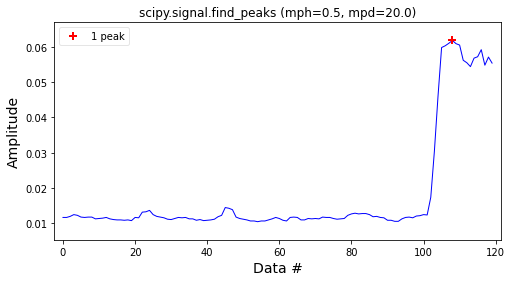

In [28]:
plot_peaks(
    data_df['s-front-end_latency'].to_numpy(),
    indexes,
    mph=height, mpd=distance, algorithm='scipy.signal.find_peaks'
)

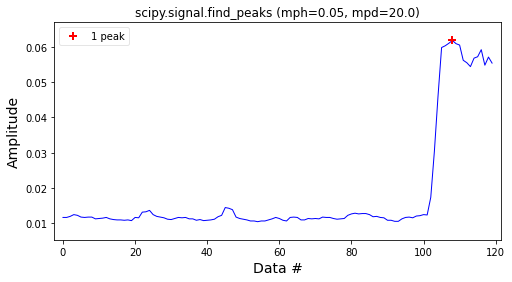

In [34]:
interval = 15
chaos_duration = 5
distance = 60/interval*chaos_duration
height = 0.05
indexes, _ = scipy.signal.find_peaks(data_df['s-front-end_latency'].to_numpy(), height=height, distance=distance)
plot_peaks(
    data_df['s-front-end_latency'].to_numpy(),
    indexes,
    mph=height, mpd=distance, algorithm='scipy.signal.find_peaks'
)

- The precision is sensitive for find_peaks's height parameter.
- It is difficult to decide the height parameter in advance.

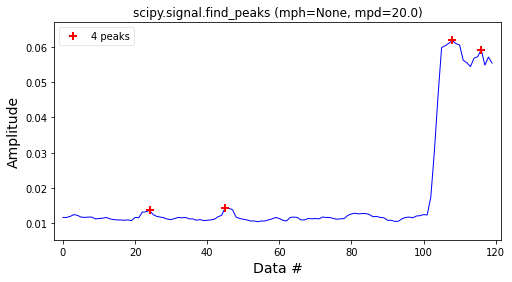

In [54]:
interval = 15
chaos_duration = 5
distance = 60/interval*chaos_duration
prominence = 0.005
indexes, _ = scipy.signal.find_peaks(data_df['s-front-end_latency'].to_numpy(), prominence=prominence, wlen=distance)
plot_peaks(
    data_df['s-front-end_latency'].to_numpy(),
    indexes,
    mpd=distance, algorithm='scipy.signal.find_peaks'
)

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-loss, chaos_comp: user


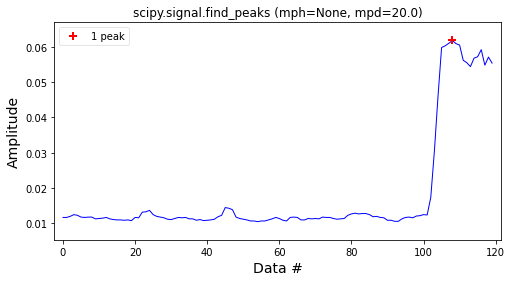

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-cpu-hog, chaos_comp: orders


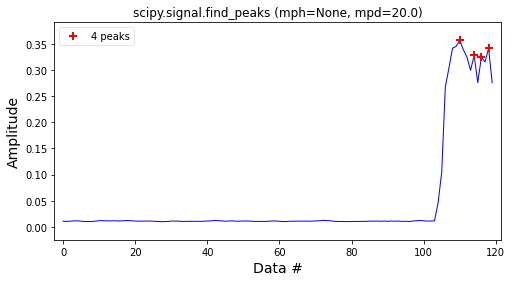

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-loss, chaos_comp: carts-db


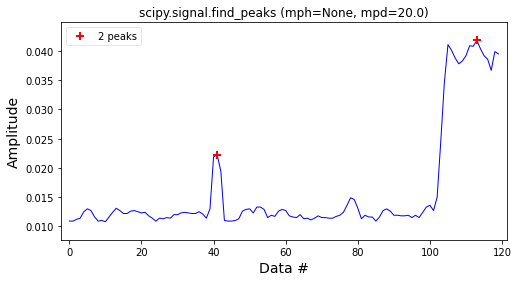

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-loss, chaos_comp: catalogue


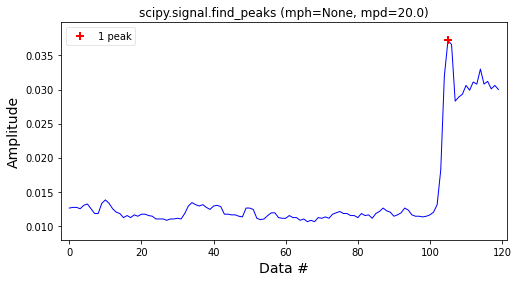

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-memory-hog, chaos_comp: carts-db


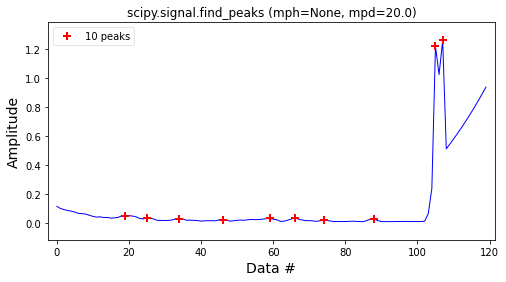

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-cpu-hog, chaos_comp: user-db


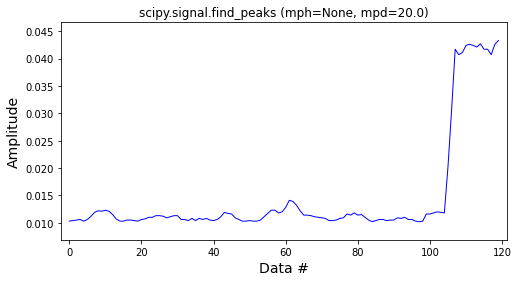

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: carts


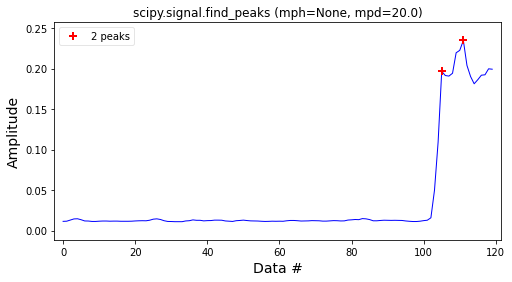

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: orders-db


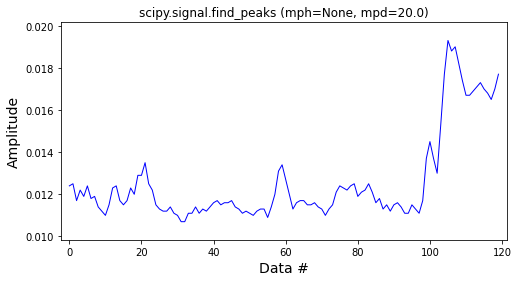

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-cpu-hog, chaos_comp: catalogue


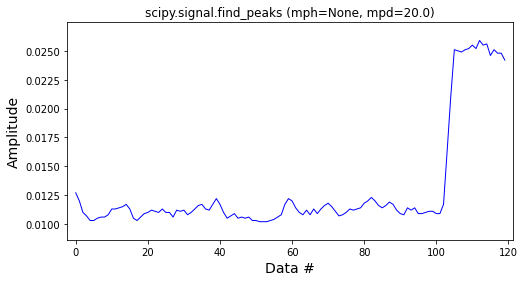

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
A

chaos_type: pod-memory-hog, chaos_comp: user-db


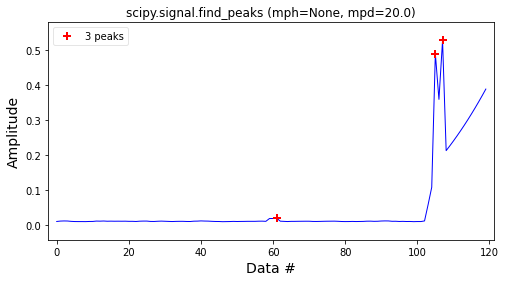

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-loss, chaos_comp: carts


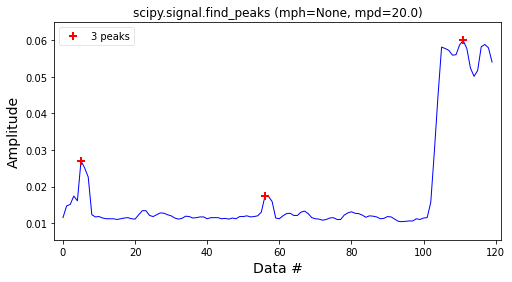

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-cpu-hog, chaos_comp: front-end


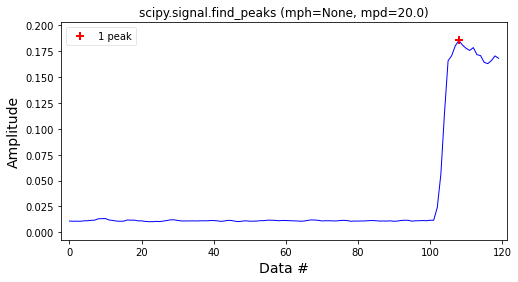

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: catalogue-db


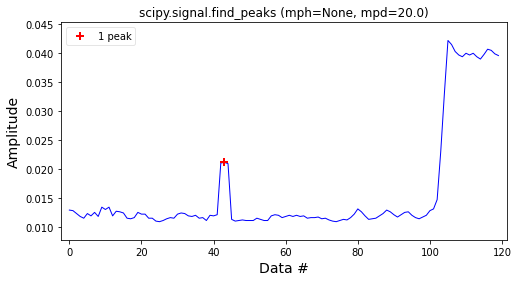

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-network-loss, chaos_comp: front-end


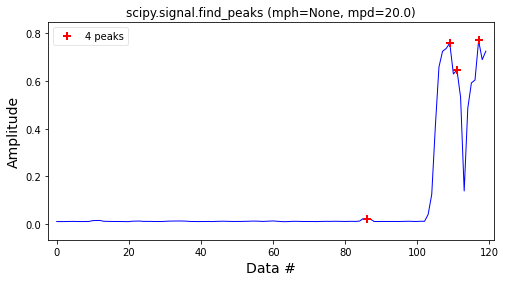

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-loss, chaos_comp: orders-db


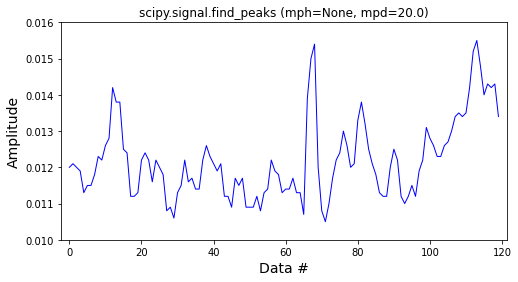

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: carts-db


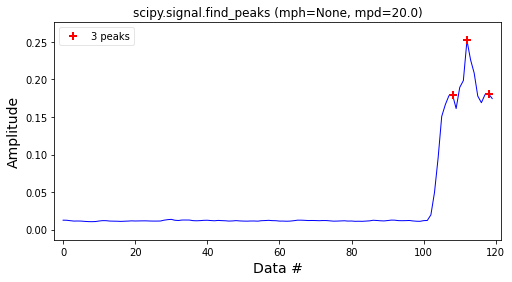

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-memory-hog, chaos_comp: catalogue


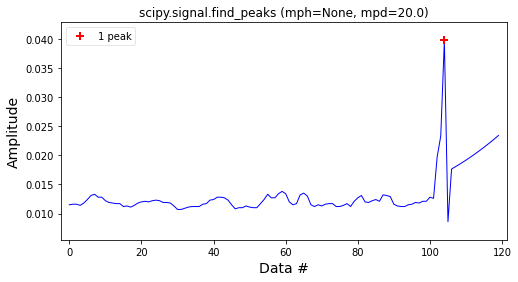

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-memory-hog, chaos_comp: orders


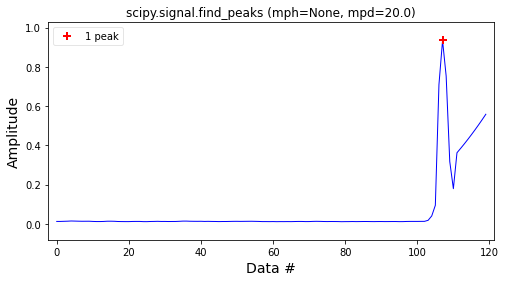

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: user


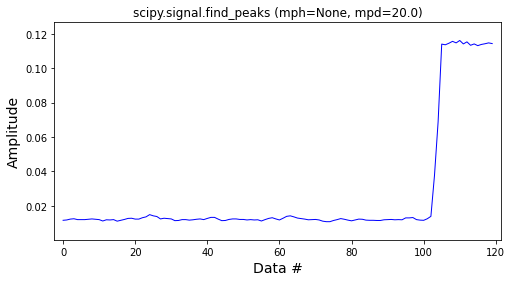

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: user-db


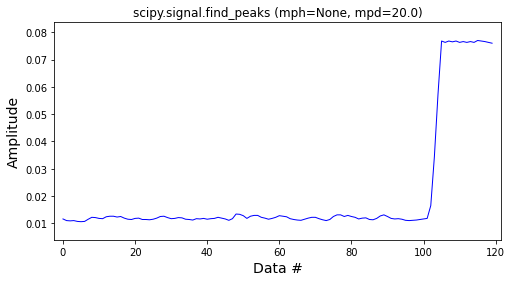

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-memory-hog, chaos_comp: user


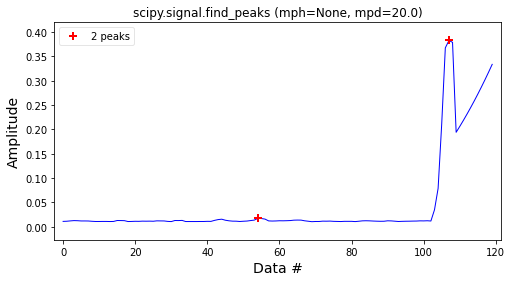

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-cpu-hog, chaos_comp: carts


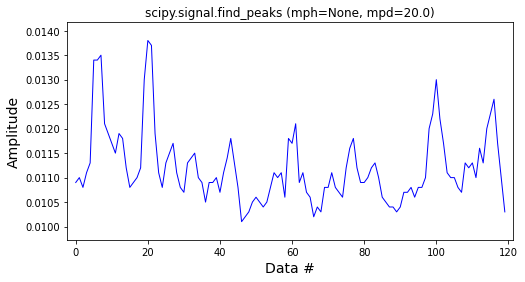

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-loss, chaos_comp: user-db


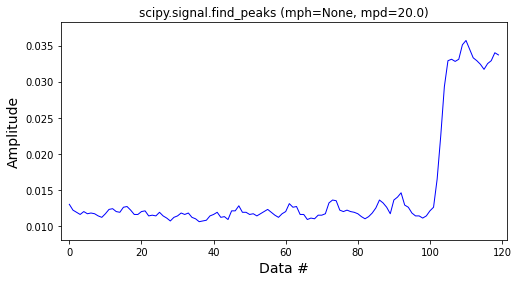

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-cpu-hog, chaos_comp: orders-db


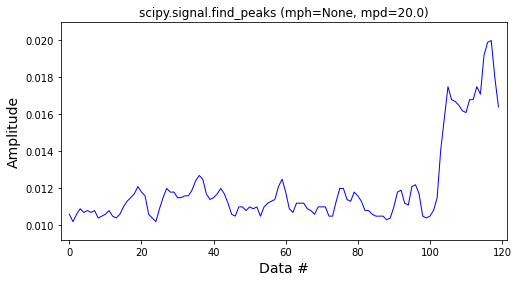

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: front-end


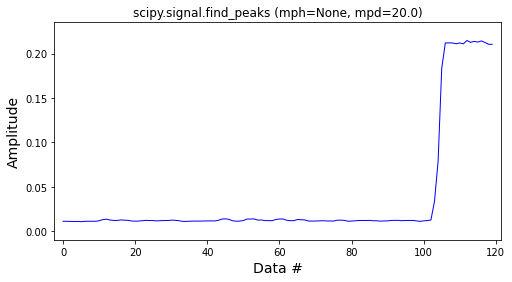

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-cpu-hog, chaos_comp: carts-db


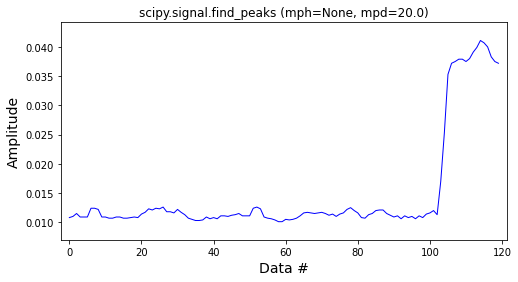

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
A

chaos_type: pod-memory-hog, chaos_comp: front-end


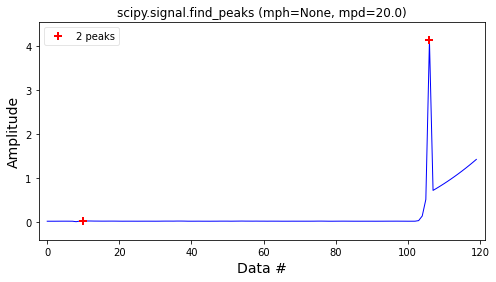

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: orders


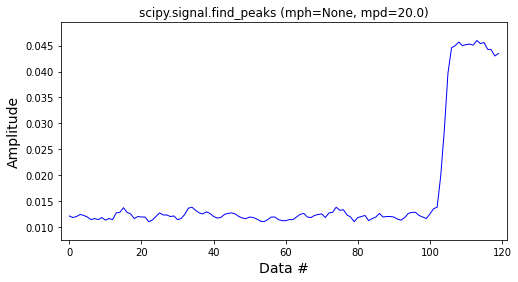

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-loss, chaos_comp: orders


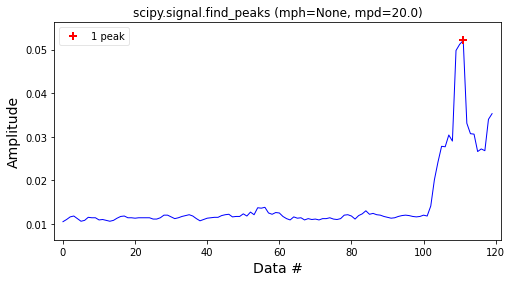

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-cpu-hog, chaos_comp: user


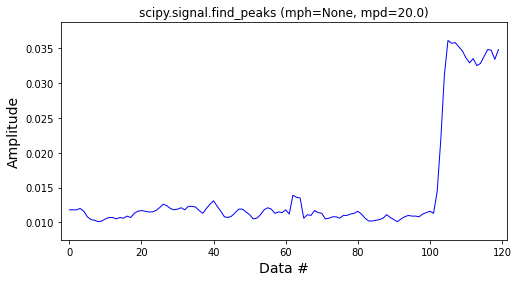

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-loss, chaos_comp: catalogue-db


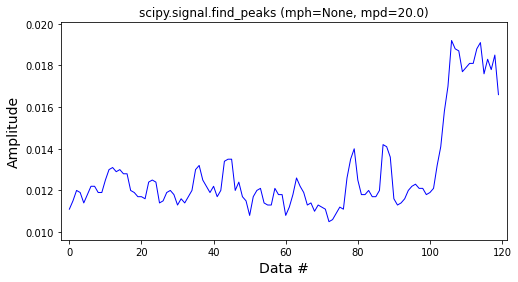

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-memory-hog, chaos_comp: orders-db


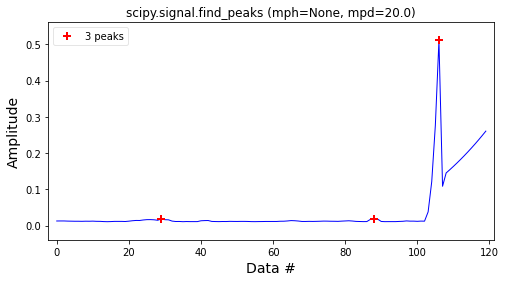

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
A

chaos_type: pod-memory-hog, chaos_comp: catalogue-db


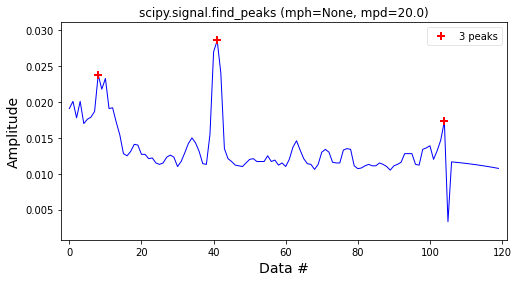

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-cpu-hog, chaos_comp: catalogue-db


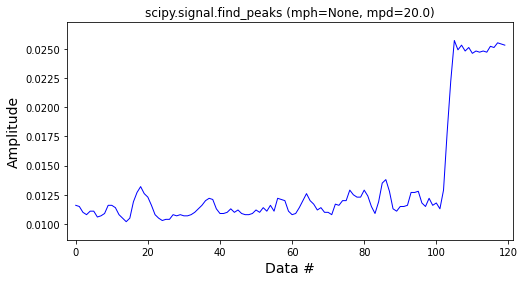

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


chaos_type: pod-network-latency, chaos_comp: catalogue


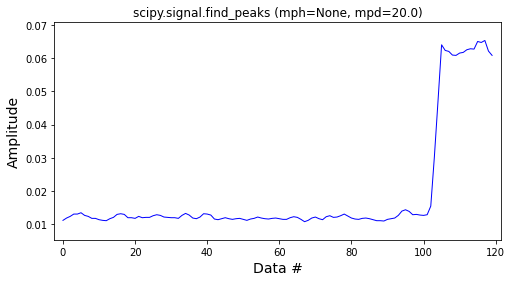

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


chaos_type: pod-memory-hog, chaos_comp: carts


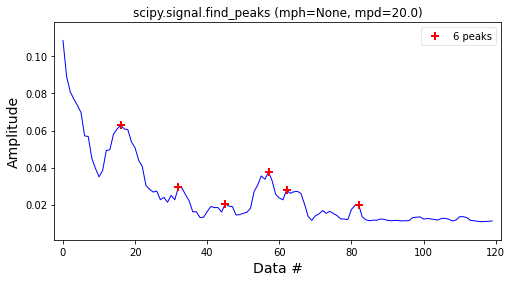

In [57]:
for root, dirs, files, _ in os.fwalk('/tmp/sockshop/metrics-g85hs/argowf-chaos-g85hs'):
    for f in files:
        if not f.endswith('.json'):
            continue
        data_df, _, metrics_meta = tsdr.read_metrics_json(os.path.join(root, f))
        chaos_type: str = metrics_meta['injected_chaos_type']
        chaos_comp: str = metrics_meta['chaos_injected_component']
        interval = 15
        chaos_duration = 5
        distance = 60/interval*chaos_duration
        prominence = 0.005
        indexes, _ = scipy.signal.find_peaks(data_df['s-front-end_latency'].to_numpy(), prominence=prominence, wlen=distance)
        print(f'chaos_type: {chaos_type}, chaos_comp: {chaos_comp}') 
        plot_peaks(
            data_df['s-front-end_latency'].to_numpy(),
            indexes,
            mpd=distance, algorithm='scipy.signal.find_peaks'
        )


## Evaludation of peak detection algorithms

- We want not peak detection but change point detection?

## Try change point detection algorithms
- https://github.com/deepcharles/ruptures

[100, 120]


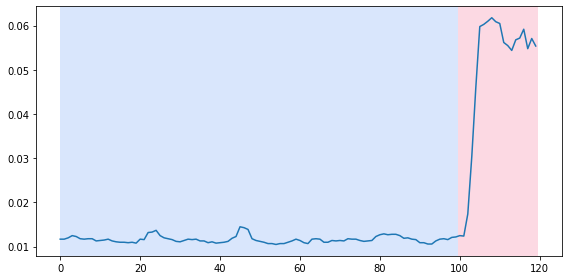

In [8]:
import matplotlib.pyplot as plt
import ruptures as rpt

series = data_df['s-front-end_latency'].to_numpy()
algo = rpt.Pelt(model="rbf").fit(series)
result = algo.predict(pen=10)
print(result)
rpt.display(series, result, figsize=(8, 4))
plt.show()

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


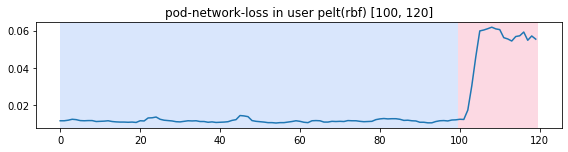

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


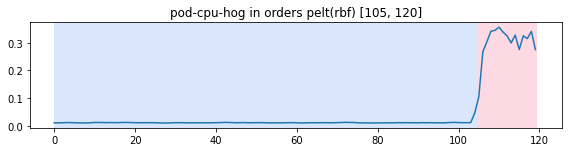

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


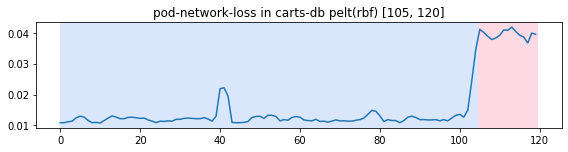

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]


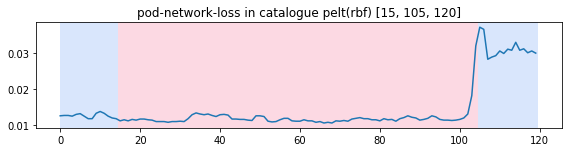

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/notebooks/../tsdr/tsdr.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df[column_name] = np.array(metric["values"], dtype=np.float64)[:, 1][-PLOTS_NUM:]
/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


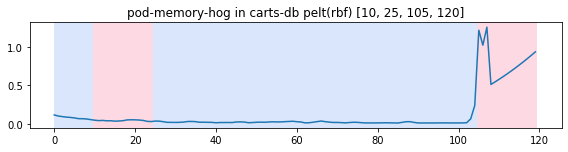

In [13]:
import os
from tsdr import tsdr

i = 0
for root, dirs, files, _ in os.fwalk('/tmp/sockshop/metrics-g85hs/argowf-chaos-g85hs'):
    for f in files:
        if not f.endswith('.json'):
            continue
        if i == 5:
            break
        i += 1

        data_df, _, metrics_meta = tsdr.read_metrics_json(os.path.join(root, f))
        chaos_type = metrics_meta['injected_chaos_type']
        chaos_comp = metrics_meta['chaos_injected_component']
        series = data_df['s-front-end_latency'].to_numpy()
        algo = rpt.Pelt(model="l2").fit(series)
        result = algo.predict(pen=1)
        rpt.display(series, result, figsize=(8,2))
        plt.title(f"{chaos_type} in {chaos_comp} pelt(rbf) {result}")
        plt.show()

In [6]:
import os
import sys

sys.path.append('..')
from tsdr import tsdr

import warnings
import pandas as pd
warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

def gen_sli_metrics(limit=5):
    i = 0
    for root, dirs, files, _ in os.fwalk('/tmp/sockshop/metrics-g85hs/argowf-chaos-g85hs'):
        for f in files:
            if not f.endswith('.json'):
                continue
            if i == limit:
                break
            i += 1

            data_df, _, metrics_meta = tsdr.read_metrics_json(os.path.join(root, f))
            chaos_type = metrics_meta['injected_chaos_type']
            chaos_comp = metrics_meta['chaos_injected_component']
            series = data_df['s-front-end_latency'].to_numpy()
            yield chaos_type, chaos_comp, series

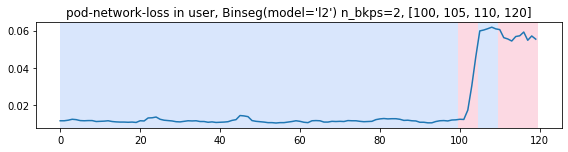

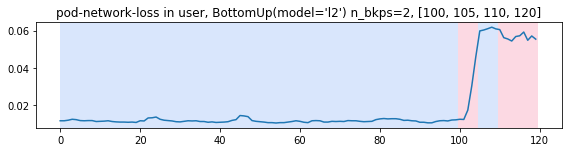

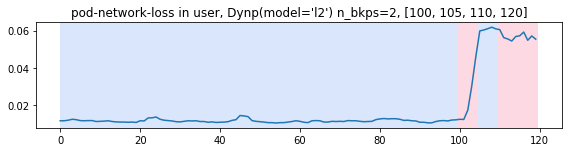

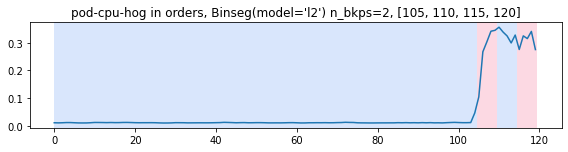

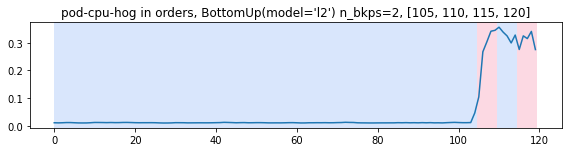

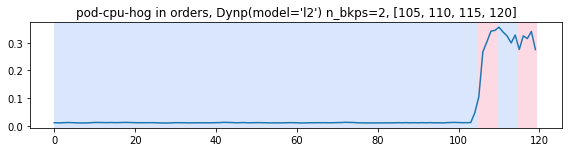

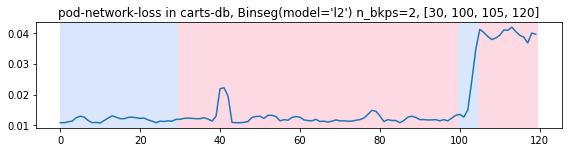

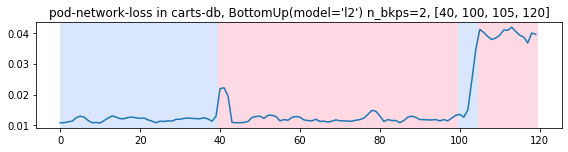

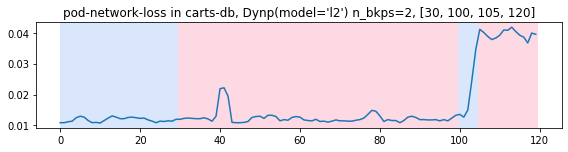

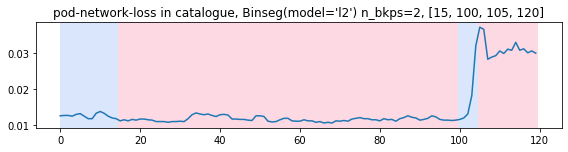

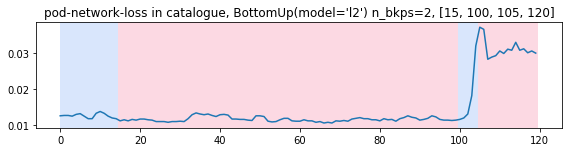

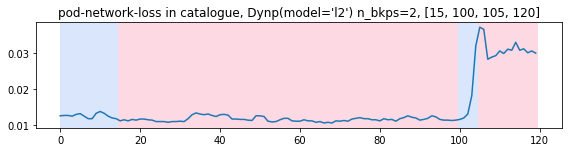

/home/ubuntu/src/github.com/ai4sre/terraria-analyzer/.venv/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


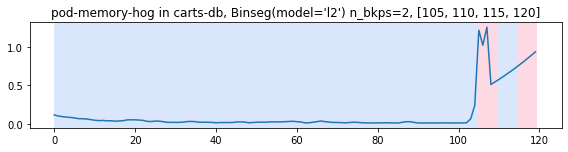

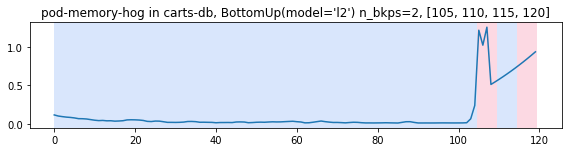

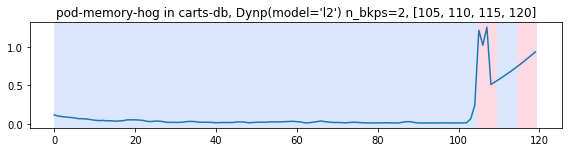

In [15]:
import ruptures as rpt
import matplotlib.pylab as plt

for chaos_type, chaos_comp, series in gen_sli_metrics():
    for method in [rpt.Binseg, rpt.BottomUp, rpt.Dynp]:
        for n_bkps in [2, 3]:
            algo = method(model='l2').fit(series)
            result = algo.predict(n_bkps=n_bkps)
            rpt.display(series, result, figsize=(8,2))
            plt.title(f"{chaos_type} in {chaos_comp}, {method.__name__}(model='l2') n_bkps={n_bkps}, {result}")
            plt.show()